# Worksheet 11 - Introduction to Statistical Inference

### Lecture and Tutorial Learning Goals:

After completing this week's lecture and tutorial work, you will be able to:
- Describe real world examples of questions that can be answered with the statistical inference methods.
- Name common population parameters (e.g., mean, proportion, median, variance, standard deviation) that are often estimated using sample data, and use computation to estimate these.
- Define the following statistical sampling terms (population, sample, population parameter, point estimate, sampling distribution).
- Explain the difference between a population parameter and sample point estimate.
- Use computation to draw random samples from a finite population.
- Use computation to create a sampling distribution from a finite population.
- Describe how sample size influences the sampling distribution.

In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
options(repr.matrix.max.rows = 6)
source('tests.R')
source('cleanup.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘infer’ was built under R version 4.0.3”
Warning message:
“package ‘cowplot’ was built under R version 4.0.3”

Attaching package: ‘testthat’


The following object is masked from ‘package:dplyr’:

    matches


The following object is masked from ‘package:purrr’:

    is_null


The following object is masked from ‘p

**Question 1.1** Matching:
<br> {points: 1}

Read the mixed up table below and assign the variables in the code cell below a number to match the the term to it's correct definition. Do not put quotations around the number or include words in the answer, we are expecting the assigned values to be numbers.

| Terms |  Definitions |
|----------------|------------|
| <p align="left">point estimate | <p align="left">1. the entire set of entities/objects of interest |
| <p align="left">population | <p align="left">2. selecting a subset of observations from a population where each observation is equally likely to be selected at any point during the selection process|
| <p align="left">random sampling | <p align="left">3. a numerical summary value about the population |
| <p align="left">representative sampling | <p align="left">4. a distribution of point estimates, where each point estimate was calculated from a different random sample from the same population |
| <p align="left">population parameter | <p align="left">5. a collection of observations from a population |
| <p align="left">sample |  <p align="left">6. a single number calculated from a random sample that estimates an unknown population parameter of interest |
| <p align="left">observation | <p align="left">7. selecting a subset of observations from a population where the sample’s characteristics are a good representation of the population’s characteristics |
| <p align="left">sampling distribution | <p align="left">8. a quantity or a quality (or set of these) we collect from a given entity/object |

In [2]:
point_estimate <- 6
population <- 1
random_sampling <- 2
representative_sampling <- 7
population_parameter <- 3
sample <- 5
observation <- 8
sampling_distribution <- 4

In [3]:
test_1.1()

[1] "Success!"


###  Virtual sampling simulation

In real life, we rarely, if ever, have measurements for our entire population. Here, however, we will pretend that we somehow were able to ask every single Candian senior what their age is. We will do this so that we can experiment to learn about sampling and how this relates to estimation.

Here we make a simulated dataset of ages for our population (all Canadian seniors) bounded by realistic values ($\geq$ 65 and $\leq$ 117):

In [4]:
# run this cell to simulate a finite population
set.seed(4321) # DO NOT CHANGE
can_seniors <- tibble(age = (rexp(2000000, rate = 0.1)^2) + 65) %>% 
    filter(age <= 117, age >= 65)
can_seniors

age
<dbl>
65.09234
92.77292
90.08786
⋮
110.89105
65.00454
108.33006


**Question 1.2** 
<br> {points: 1}

A distribution defines all the possible values (or intervals) of the data and how often they occur. Visualize the distribution of the population (`can_seniors`) that was just created by plotting a histogram using `binwidth = 1` in the `geom_histogram` argument. Name the plot `pop_dist` and give the x-axis a descriptive label.

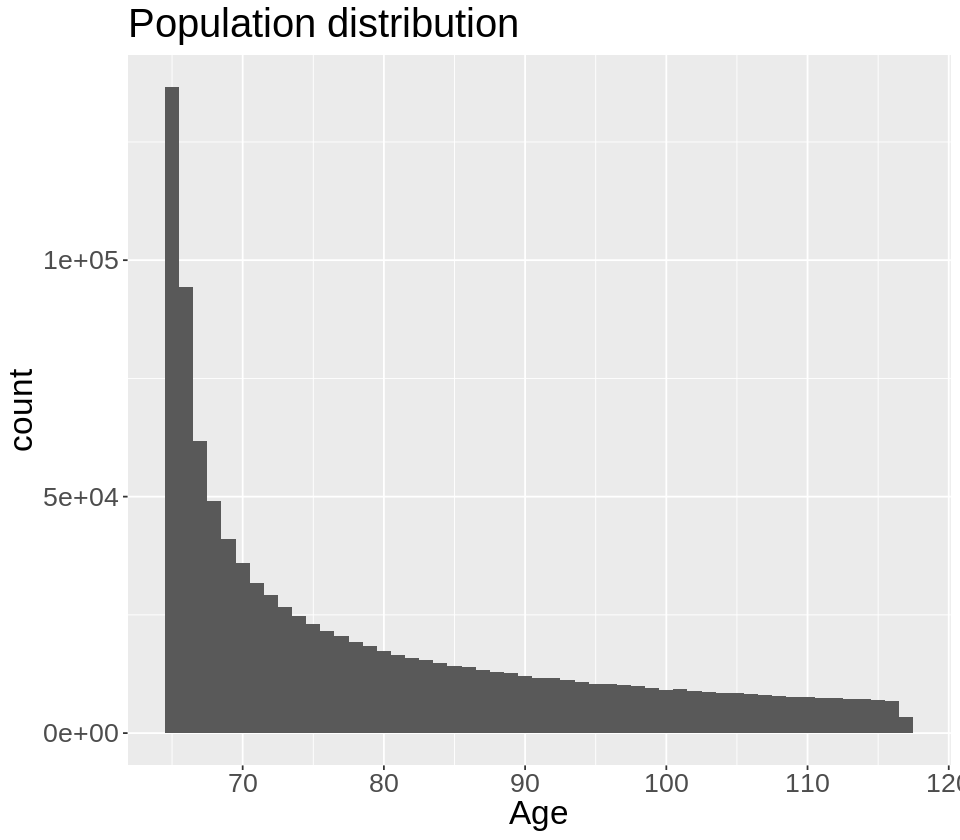

In [10]:
options(repr.plot.width = 8, repr.plot.height = 7)
# ... <- ggplot(..., ...) + 
#    geom_...(...) +
#    ... +
#    ggtitle("Population distribution")

pop_dist <- ggplot(can_seniors, aes(x = age)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Age") +
    ggtitle("Population distribution") +
    theme(text = element_text(size = 20))
pop_dist

In [11]:
test_1.2()

[1] "Success!"


**Question 1.3** 
<br> {points: 1}

Distributions are complicated to communicate, thus we often want to represent them by a single value or small number of values. Common values used for this include the mean, median, standard deviation, etc). 

Use `summarize` to calculate the following population parameters from the `can_seniors` population:
- mean (use the `mean` function)
- median (use the `median` function)
- standard deviation (use the `sd` function)

Name this data frame `pop_parameters` which has the column names `pop_mean`, `pop_med` and `pop_sd`.

In [12]:
pop_parameters <- can_seniors %>%
    summarize(
        pop_mean = mean(age),
        pop_med = median(age),
        pop_sd = sd(age))
pop_parameters

pop_mean,pop_med,pop_sd
<dbl>,<dbl>,<dbl>
79.30102,73.80002,14.61612


In [13]:
test_1.3()

[1] "Success!"


**Question 1.4** 
<br> {points: 1}

In real life, we usually are able to only collect a single sample from the population. We use that sample to try to infer what the population looks like.

Take a single random sample of 40 observations from the Canadian seniors population (`can_seniors`). Name it `sample_1`. Use 4321 as your seed.

In [14]:
set.seed(4321) # DO NOT CHANGE!
# ... <- ... %>% 
#    rep_sample_n(...)

sample_1 <- can_seniors %>%
    rep_sample_n(size = 40)

In [15]:
test_1.4()

[1] "Success!"


**Question 1.5** 
<br> {points: 1}

Visualize the distribution of the random sample you just took (`sample_1`) that was just created by plotting a histogram using `binwidth = 1` in the `geom_histogram` argument. Name the plot `sample_1_dist` and give the plot (using `ggtitle`) and the x-axis a descriptive label.

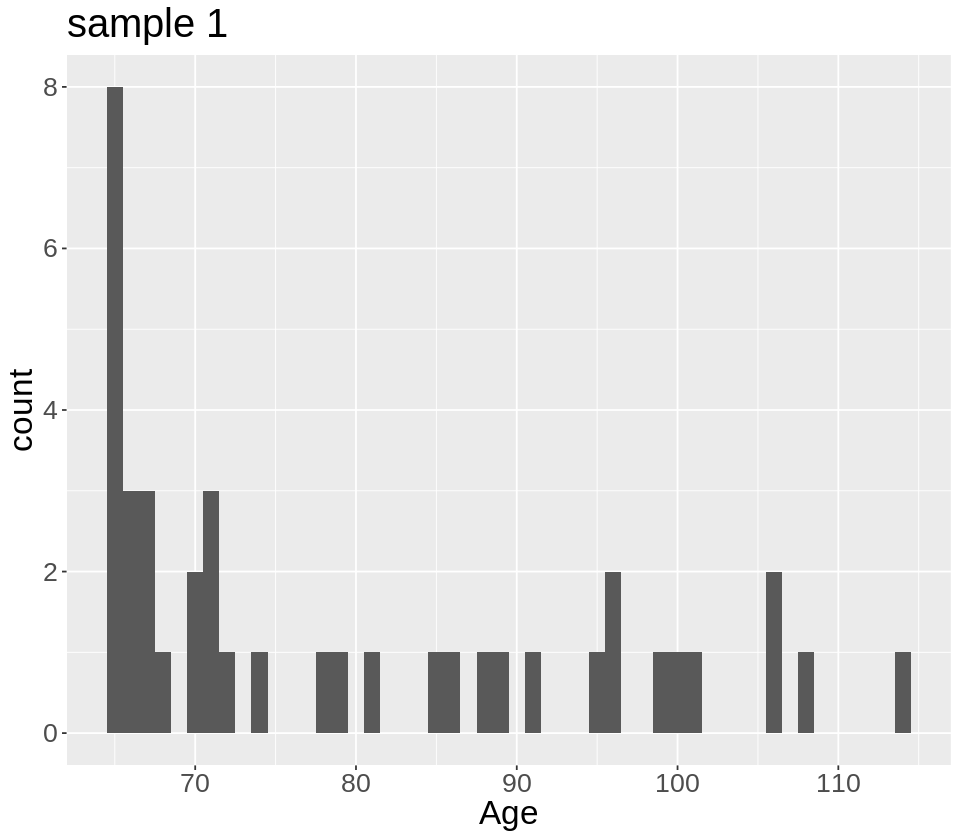

In [18]:
options(repr.plot.width = 8, repr.plot.height = 7)

sample_1_dist <- ggplot(sample_1, aes(x = age)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Age", title = "sample 1") +
    theme(text = element_text(size = 20))
sample_1_dist

In [19]:
test_1.5()

[1] "Success!"


**Question 1.6** 
<br> {points: 1}

Use `summarize` to calculate the following point estimates from the random sample you just took (`sample_1`):
- mean 
- median 
- standard deviation 

Name this data frame `sample_1_estimates` which has the column names `sample_1_mean`, `sample_1_med` and `sample_1_sd`.

In [20]:
sample_1_estimates <- sample_1 %>%
    summarize(
        sample_1_mean = mean(age),
        sample_1_med = median(age),
        sample_1_sd = sd(age))
sample_1_estimates

`summarise()` ungrouping output (override with `.groups` argument)



replicate,sample_1_mean,sample_1_med,sample_1_sd
<int>,<dbl>,<dbl>,<dbl>
1,79.63442,71.63091,15.34286


In [21]:
test_1.6()

[1] "Success!"


Let's now compare our random sample to the population from where it was drawn:

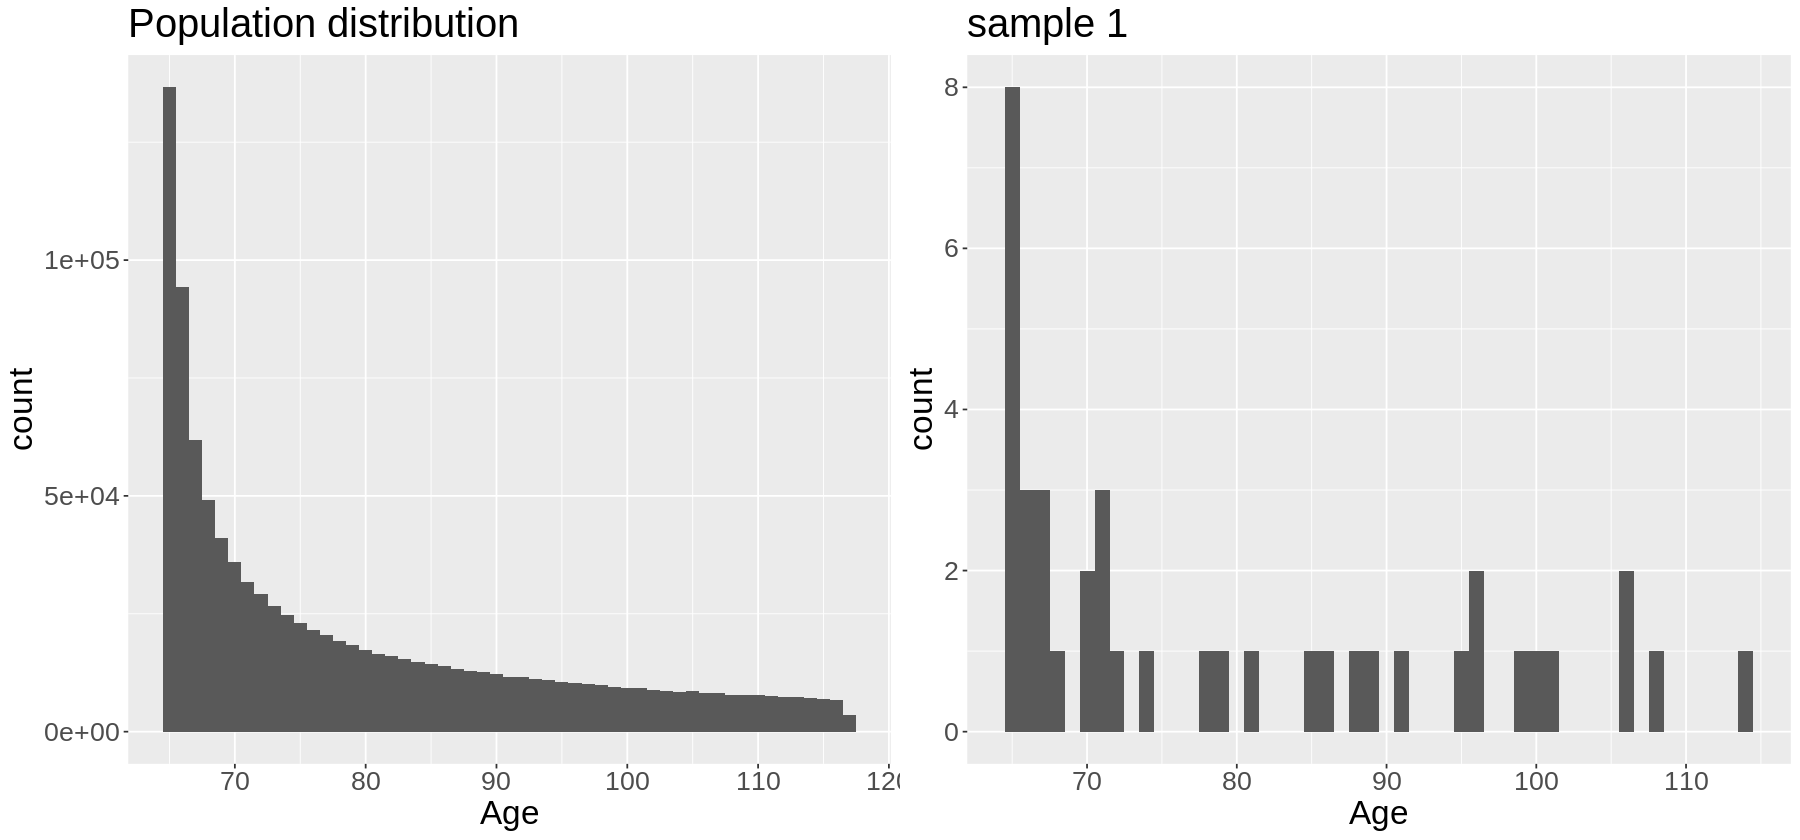

In [22]:
# run this code cell
options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(pop_dist, sample_1_dist, ncol = 2)

And now let's compare the point estimates (mean, median and standard deviation) with the true population parameters we were trying to estimate:

In [23]:
# run this cell
pop_parameters
sample_1_estimates %>% select(-replicate)

pop_mean,pop_med,pop_sd
<dbl>,<dbl>,<dbl>
79.30102,73.80002,14.61612


sample_1_mean,sample_1_med,sample_1_sd
<dbl>,<dbl>,<dbl>
79.63442,71.63091,15.34286


**Question 1.7** Multiple Choice
<br> {points: 1}

After comparing the population and sample distributions above, and the true population parameters and the sample point estimates, which statement below **is not** correct:

A. The sample point estimates are close to the values for the true population parameters we are trying to estimate

B. The sample distribution is of a similar shape to the population distribution

C. The sample point estimates are identical to the values for the true population parameters we are trying to estimate

*Assign your answer to an object called `answer1.7`. Your answer should be a single character surrounded by quotes.*

In [24]:
answer1.7 <- "C"

In [25]:
test_1.7()

[1] "Success!"


**Question 1.8.0** 
<br> {points: 1}

What if we took another sample? What would we expect? Let's try! Take another random sample of size 40 from population (using a different random seed this time so that you get a different sample), and visualize its distribution and calculate the point estimates for the sample mean, median and standard deviation. Name your random sample of data `sample_2`, name your visualization  `sample_2_dist`, and finally name your estimates `sample_2_estimates`, which has the column names `sample_2_mean`, `sample_2_med` and `sample_2_sd`. 

`summarise()` ungrouping output (override with `.groups` argument)



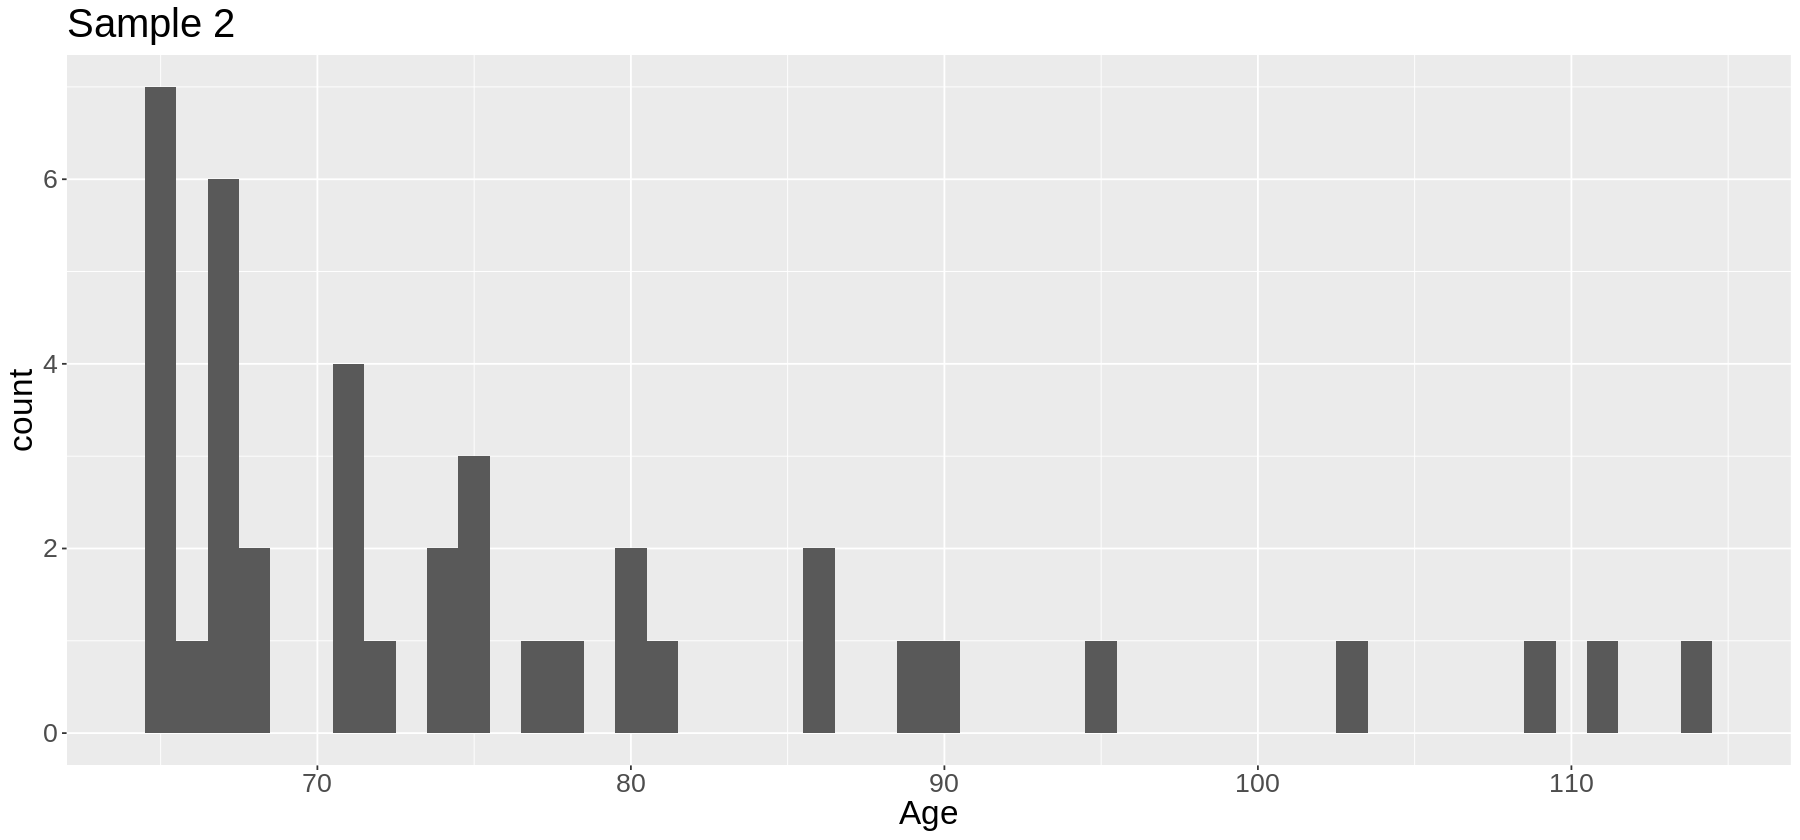

In [28]:
set.seed(2020) # DO NOT CHANGE!

sample_2 <- can_seniors %>%
    rep_sample_n(size = 40)

sample_2_dist <- ggplot(sample_2, aes(x = age)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Age", title = "Sample 2") +
    theme(text = element_text(size = 20))
sample_2_dist

sample_2_estimates <- sample_2 %>%
    summarize(
        sample_2_mean = mean(age),
        sample_2_med = median(age),
        sample_2_sd = sd(age))


In [29]:
test_1.8.0()

[1] "Success!"


**Question 1.8.1** 
<br> {points: 1}

After comparing the distribution and point estimates of this second random sample from the population with that of the first random sample and the population, which of the following statements below **is not** correct:

A. The sample distributions from different random samples are of a similar shape to the population distribution, but they vary a bit depending which values are captured in the sample

B. The sample point estimates from different random samples are close to the values for the true population parameters we are trying to estimate, but they vary a bit depending which values are captured in the sample

C. Every random sample from the same population should have an identical set of values and yield identical point estimates.

*Assign your answer to an object called `answer1.8.1`. Your answer should be a single character surrounded by quotes.*

pop_mean,pop_med,pop_sd
<dbl>,<dbl>,<dbl>
79.30102,73.80002,14.61612


sample_1_mean,sample_1_med,sample_1_sd
<dbl>,<dbl>,<dbl>
79.63442,71.63091,15.34286


sample_2_mean,sample_2_med,sample_2_sd
<dbl>,<dbl>,<dbl>
76.69401,71.34158,13.56326


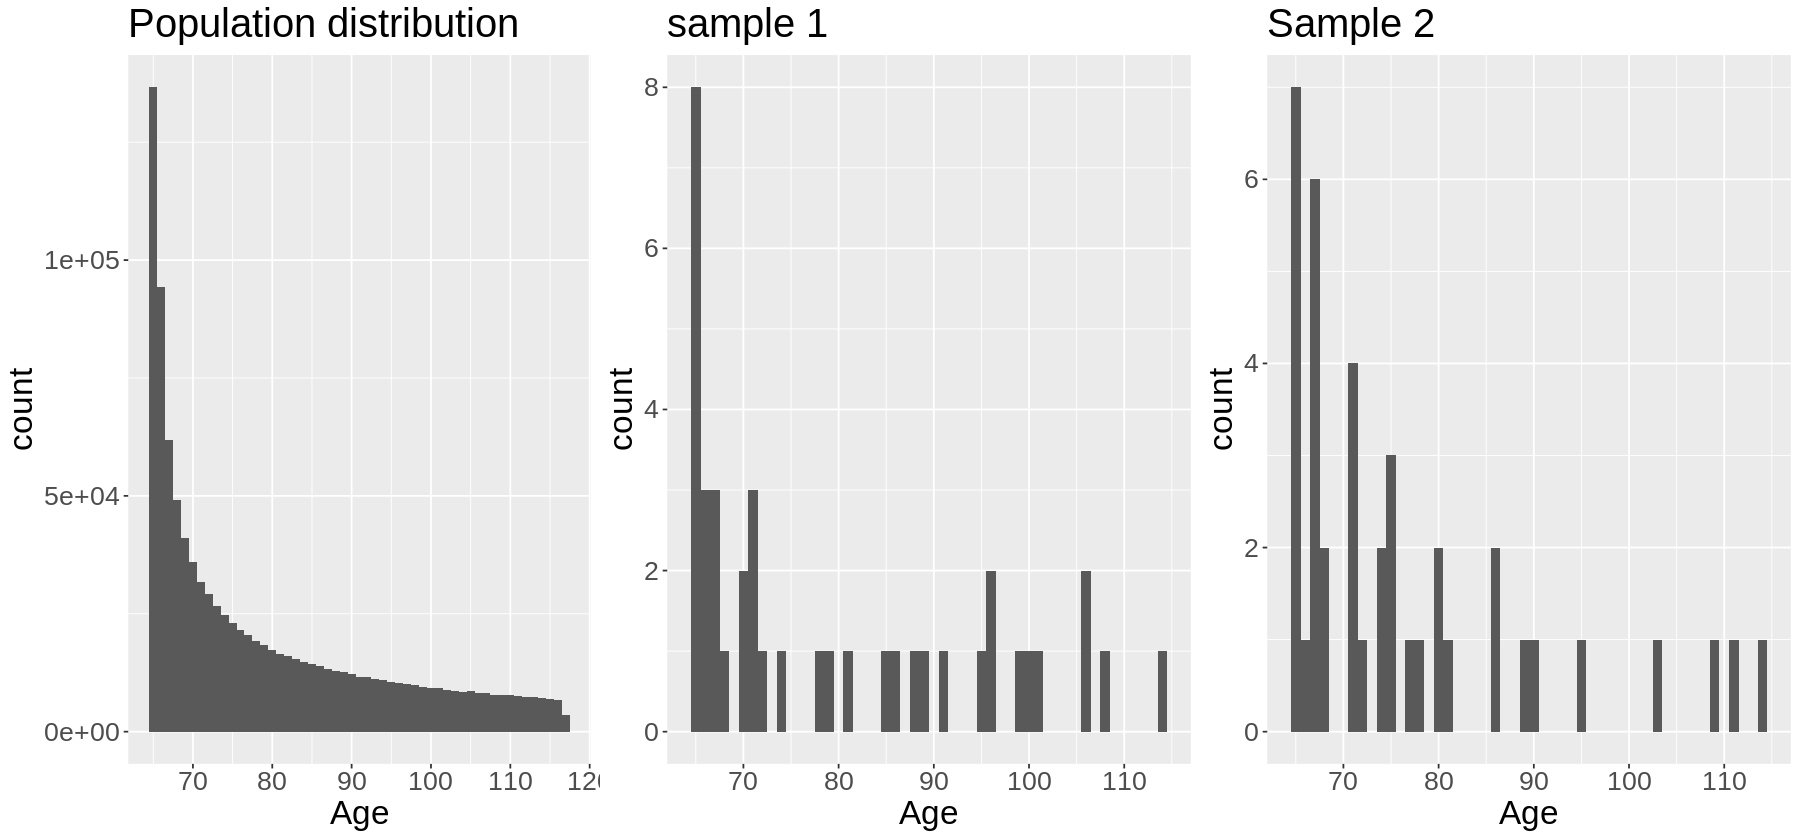

In [30]:
pop_parameters
sample_1_estimates %>% select(-replicate)
sample_2_estimates %>% select(-replicate)

options(repr.plot.width = 15, repr.plot.height = 7)
plot_grid(pop_dist, sample_1_dist, sample_2_dist, ncol = 3)

In [31]:
answer1.8.1 <- "C"

In [32]:
test_1.8.1()

[1] "Success!"


### Exploring the sampling distribution of an estimate

Just how much should we expect the point estimates of our random samples to vary? To build an intuition for this, let's experiment a little more with our population of Canadian seniors. To do this we will take 1500 random samples, and then calculate the point estimate we are interested in (let's choose the mean for this example) for each sample. Finally, we will visualize the distribution of the sample point estimates. This distribution will tell us how much we would expect the point estimates of our random samples to vary for this population for samples of size 40 (the size of our samples).

**Question 1.9** 
<br> {points: 1}

Draw 1500 random samples from our population of Canadian seniors (`can_seniors`). Each sample should have 40 observations. Name the data frame `samples` and use the seed `4321`. Here we use the functions `head()`, `tail()` and `dim()` to view the first few rows, the last few rows and the dimension of the data set respectively. 

In [33]:
# ... <- rep_sample_n(..., size = ..., reps = ...)
set.seed(4321) # DO NOT CHANGE!

samples <- rep_sample_n(can_seniors, size = 40, reps = 1500)

head(samples)
tail(samples)
dim(samples)

replicate,age
<int>,<dbl>
1,70.68021
1,99.73999
1,66.98616
1,65.00736
1,106.45487
1,65.10314


replicate,age
<int>,<dbl>
1500,88.90578
1500,69.40992
1500,67.69432
1500,115.94393
1500,81.64137
1500,86.80794


[1] 60000     2

In [34]:
test_1.9()

[1] "Success!"


**Question 2.0** 
<br> {points: 1}

Group by the sample replicate number, and then for each sample, calculate the mean as the point estimate. Name the data frame `sample_estimates`. The data frame should have the column names `replicate` and `sample_mean`.

In [35]:
sample_estimates <- samples %>%
    group_by(replicate) %>%
    summarize(
        sample_mean = mean(age))

head(sample_estimates)
tail(sample_estimates)

`summarise()` ungrouping output (override with `.groups` argument)



replicate,sample_mean
<int>,<dbl>
1,79.63442
2,76.86979
3,77.53117
4,75.61808
5,80.64416
6,80.53773


replicate,sample_mean
<int>,<dbl>
1495,79.73833
1496,79.17743
1497,76.29373
1498,76.39571
1499,78.33894
1500,77.72910


In [36]:
test_2.0()

[1] "Success!"


**Question 2.1** 
<br> {points: 1}

Visualize the distribution of the sample estimates (`sample_estimates`) you just calculated by plotting a histogram using `binwidth = 1` in the `geom_histogram` argument. Name the plot `sampling_distribution` and give the plot title (using `ggtitle`) and the x-axis a descriptive label.

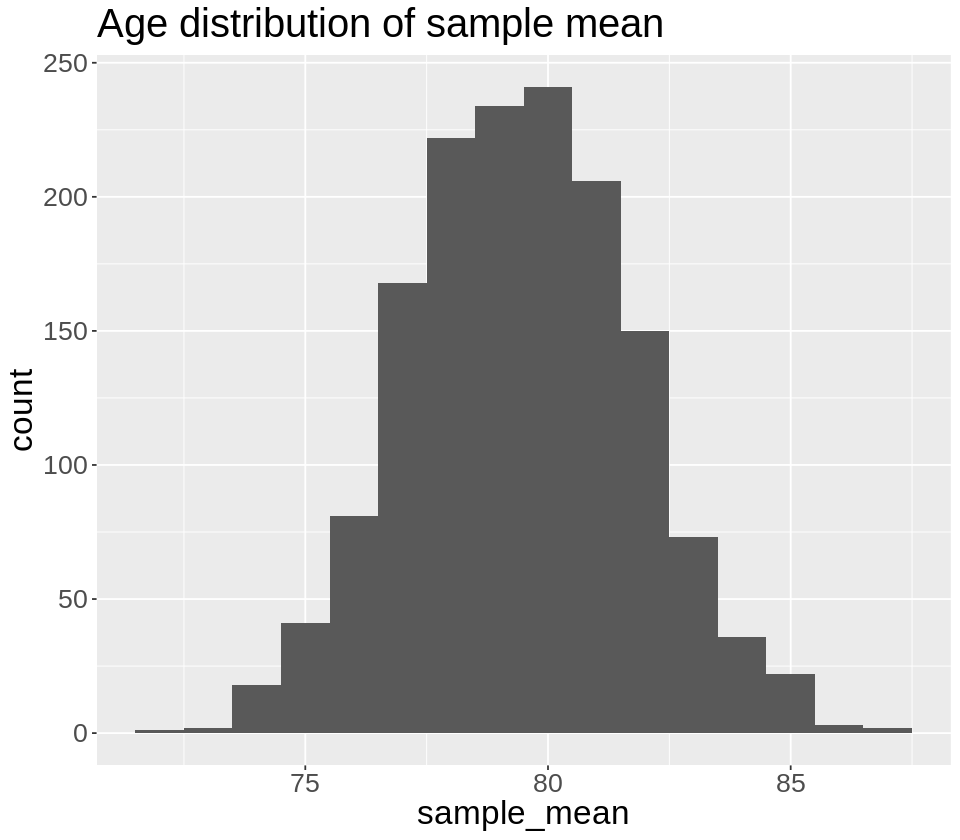

In [37]:
options(repr.plot.width = 8, repr.plot.height = 7)

sampling_distribution <- ggplot(sample_estimates, aes(x = sample_mean)) +
    geom_histogram(binwidth = 1) +
    ggtitle("Age distribution of sample mean") +
    theme(text = element_text(size = 20)) 
sampling_distribution

In [38]:
test_2.1()

[1] "Success!"


**Question 2.2** 
<br> {points: 1}

Let's refresh our memories: what is the mean age of the whole population (we calculated this above)? *Assign your answer to an object called `answer2.2`. Your answer should be a single number reported to two decimal places.*


In [39]:
answer2.2 <- pop_parameters %>%
    select(pop_mean)
answer2.2

pop_mean
<dbl>
79.30102


In [40]:
test_2.2()

[1] "Success!"


**Question 2.3** Multiple Choice
<br> {points: 1}

Considering the true value for the population mean, and the sampling distribution you created and visualized in **question 2.1**, which of the following statements below **is not** correct:

A. The sampling distribution is centered at the true population mean

B. All the sample means are the same value as the true population mean

C. Most sample means are at or very near the same value as the true population mean

D. A few sample means are far away from the same value as the true population mean

*Assign your answer to an object called `answer2.3`. Your answer should be a single character surrounded by quotes.*

In [41]:
answer2.3 <- "B"

In [42]:
test_2.3()

[1] "Success!"


**Question 2.4** True/False
<br> {points: 1}

Taking a random sample and calculating a point estimate is a good way to get a "best guess" of the population parameter you are interested in. True or False?

*Assign your answer to an object called `answer2.4`. Your answer should be either "True" or "False", surrounded by quotes.*

In [43]:
answer2.4 <- "True"

In [44]:
test_2.4()

[1] "Success!"


### The influence of sample size on the sampling distribution

What happens to our point estimate when we change the sample size? Let's answer this question by experimenting! We will create 3 different sampling distributions of sample means, each using a different sample size. As we did above, we will draw samples from our Canadian seniors population. We will visualize these sampling distributions and see if we can see a pattern when we vary the sample size.

**Question 2.5** 
<br> {points: 1}

Using the same strategy as you did above, draw 1500 random samples from the Canadian seniors population (`can_seniors`), each of size 20. For each sample, calculate the mean age and assign this data to a column called `sample_mean`. 

Then, visualize the distribution of the sample estimates (means) you just calculated by plotting a histogram using `binwidth = 1` in the `geom_histogram` argument. Name the plot `sampling_distribution_20` and give the x-axis a descriptive label. Give the plot the title "n = 20". Also specify the x-axis limits to be 65 and 95 using `xlim(c(65, 95))`.

Set the seed as 4321 when you collect your samples.

In [45]:
set.seed(4321) # DO NOT CHANGE THIS!
options(repr.plot.width = 8, repr.plot.height = 7)

sample20 <- rep_sample_n(can_seniors, size = 20, reps = 1500) 

sample20_estimates <- sample20 %>%
    group_by(replicate) %>%
    summarize(
        sample_mean = mean(age))

sampling_distribution_20 <- ggplot(sample20_estimates, aes(x = sample_mean)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Sample mean", title = "n = 20") +
    theme(text = element_text(size = 20)) +
    xlim(c(65, 95))

`summarise()` ungrouping output (override with `.groups` argument)



In [46]:
test_2.5()

[1] "Success!"


**Question 2.6** 
<br> {points: 1}

Using the same strategy as you did above, draw 1500 random samples from the Canadian seniors population (`can_seniors`), each of size 100. For each sample, calculate the mean age and assign this data to a column called `sample_mean`. 

Then visualize the distribution of the sample estimates (means) you just calculated by plotting a histogram using `binwidth = 1` in the `geom_histogram` argument. Name the plot `sampling_distribution_100` and give the x axis a descriptive label. Give the plot the title "n = 100". Also specify the x-axis limits to be 65 and 95 using `xlim(c(65, 95))`.

Set the seed as 4321 when you collect your samples.

In [47]:
set.seed(4321) # DO NOT CHANGE THIS!
options(repr.plot.width = 8, repr.plot.height = 7)

sample100 <- rep_sample_n(can_seniors, size = 100, reps = 1500) 

sample100_estimates <- sample100 %>%
    group_by(replicate) %>%
    summarize(
        sample_mean = mean(age))

sampling_distribution_100 <- ggplot(sample100_estimates, aes(x = sample_mean)) +
    geom_histogram(binwidth = 1) +
    labs(x = "Sample mean", title = "n = 100") +
    theme(text = element_text(size = 20)) +
    xlim(c(65, 95))


`summarise()` ungrouping output (override with `.groups` argument)



In [49]:
test_2.6()

[1] "Success!"


In [50]:
# run this cell to change the sampling distribution plot created
# earlier in the notebook so that the x-axis is the same dimensions
# as the other two plots you just made, and so that the title is "n = 40"
sampling_distribution <- sampling_distribution + 
    xlim(c(65, 95))
sampling_distribution$labels$title <- "n = 40"

**Question 2.7** 
<br> {points: 1}

Fill in the blanks in the code below to use `plot_grid` to plot the three sampling distributions side-by-side. Order them from smallest sample size on the left, to largest sample size on the right. Name the final panel figure `sampling_distribution_panel`.

Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”
Warning message:
“Removed 2 rows containing missing values (geom_bar).”


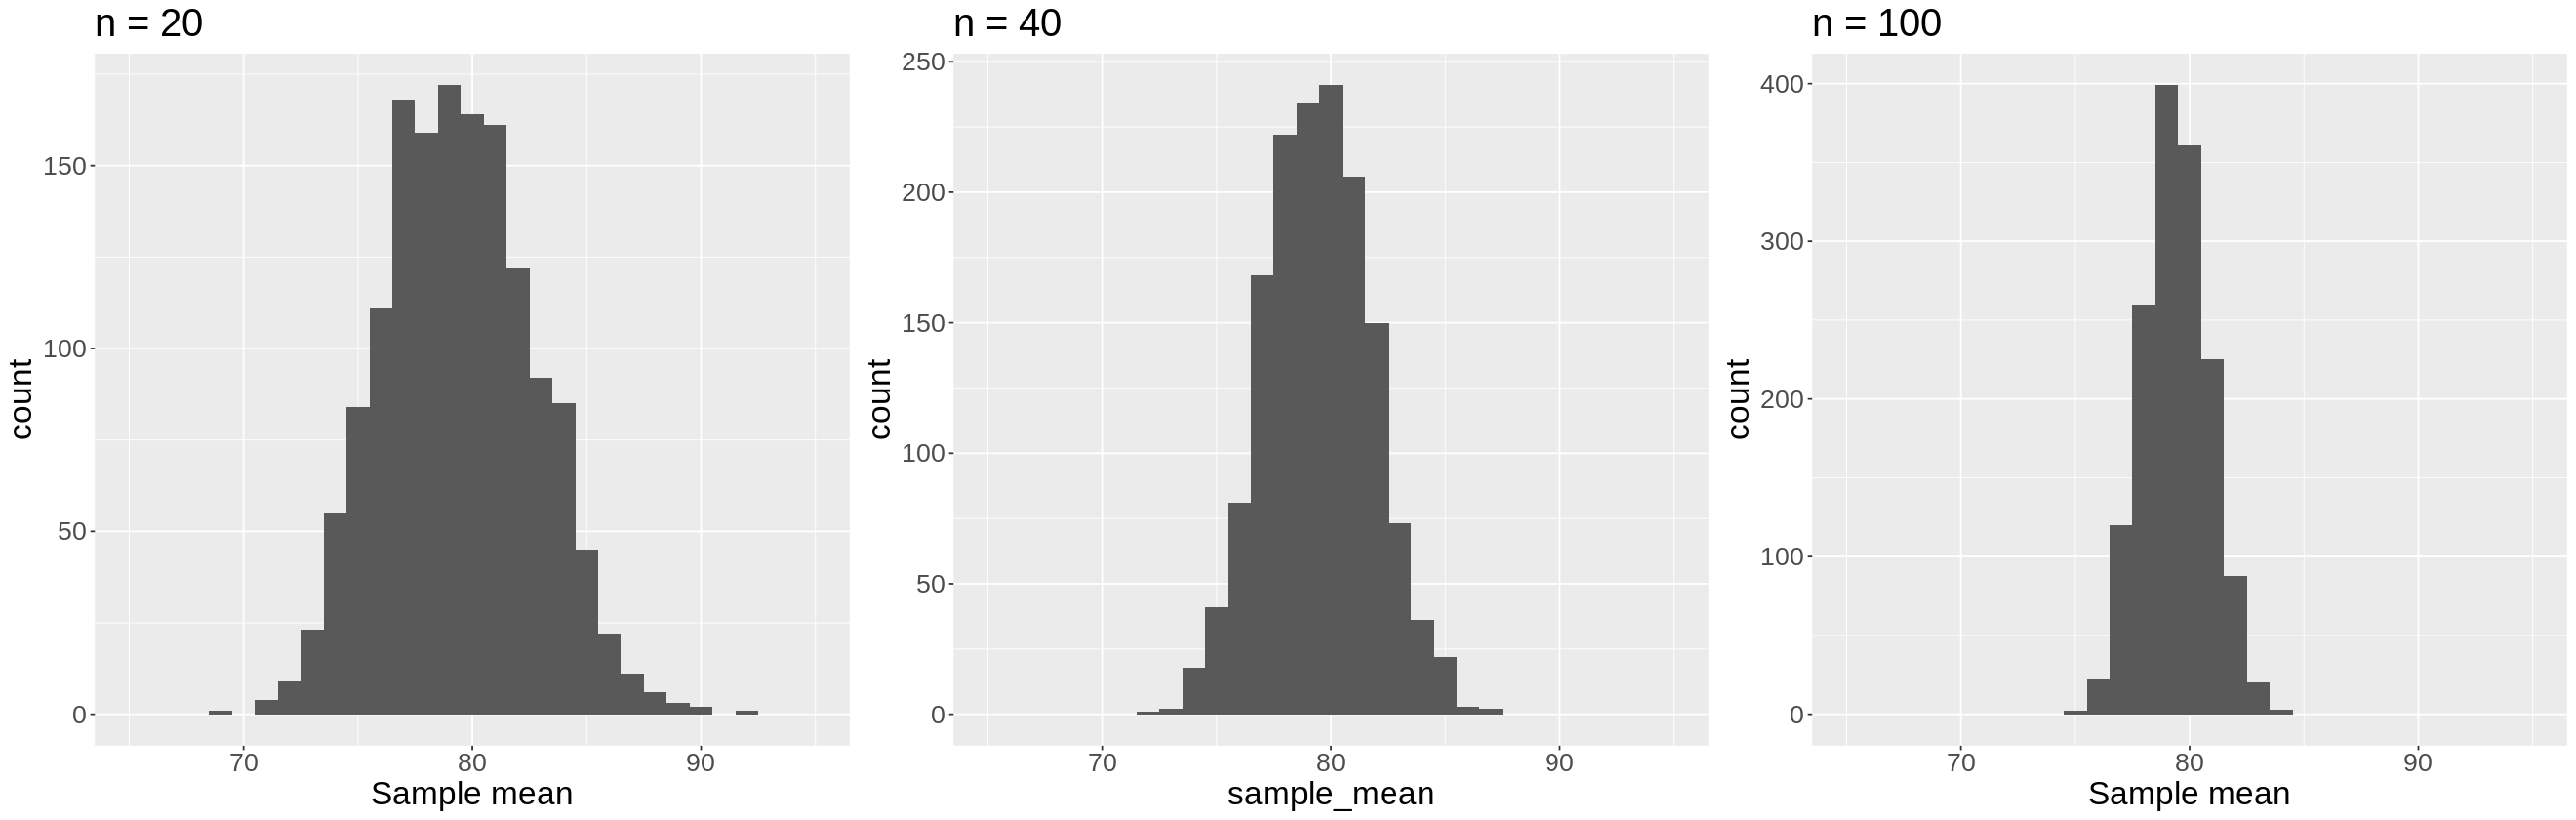

In [54]:
options(repr.plot.width = 22)
# ... <- plot_grid(...,
#                   ...,
#                   ...,
#                   ncol = 3)

sampling_distribution_panel <- plot_grid(sampling_distribution_20,
                                         sampling_distribution,
                                         sampling_distribution_100,
                                         ncol = 3)
sampling_distribution_panel

In [55]:
test_2.7()

[1] "Success!"


**Question 2.8** Multiple Choice
<br> {points: 1}

Considering the panel figure you created above in **question 2.7**, which of the following statements below **is not** correct:

A. As the sample size increases, the sampling distribution of the point estimate becomes narrower.

B. As the sample size increases, more sample point estimates are closer to the true population mean.

C. As the sample size decreases, the sample point estimates become more variable (spread out).

D. As the sample size increases, the sample point estimates become more variable (spread out).

*Assign your answer to an object called `answer2.8`. Your answer should be a single character surrounded by quotes.*

In [56]:
answer2.8 <- ""

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: answer2.8 <- 
   ^


In [138]:
test_2.8()

[1] "Success!"


**Question 2.9** True/False
<br> {points: 1}

Given what you observed above, and considering the real life scenario where you will only have one sample, answer the True/False question below:

The smaller your random sample, the better your sample point estimate reflect the true population parameter you are trying to estimate. True or False?

*Assign your answer to an object called `answer2.9`. Your answer should be either "true" or "false", surrounded by quotes.*

In [139]:
answer2.9 <- 

In [140]:
test_2.9()

[1] "Success!"


In [141]:
source('cleanup.R')